# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [24]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

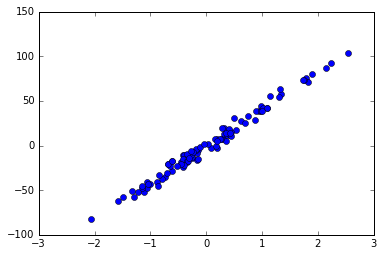

In [61]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o')

############### More DATASETS #######################

(x2,y2) = make_regression(n_samples = 100, n_features=n_dimensions, noise = 10)
(x2_test, y2_test) = make_regression(n_samples=50, n_features=n_dimensions, noise = 10)
(x3,y3) = make_regression(n_samples = 200, n_features=n_dimensions, noise = 5)
(x3_test, y3_test) = make_regression(n_samples=100, n_features=n_dimensions, noise = 5)
(x4,y4) = make_regression(n_samples = 1000, n_features=n_dimensions, noise = 5)
(x4_test, y4_test) = make_regression(n_samples=500, n_features=n_dimensions, noise = 5)
(x5,y5) = make_regression(n_samples = 200, n_features=n_dimensions, noise = 10)
(x5_test, y5_test) = make_regression(n_samples=100, n_features=n_dimensions, noise = 10)




# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

-1.38016806227


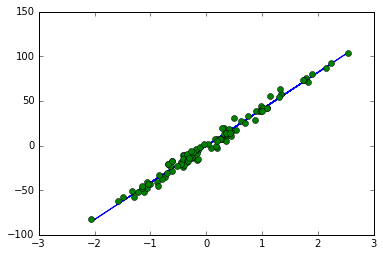

In [62]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()


0.989123604925


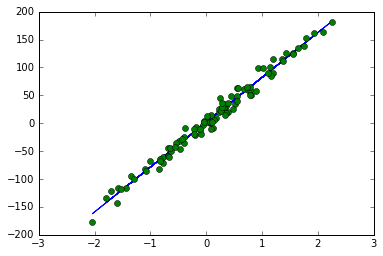

In [63]:
#Fit the regression object on the data
regr.fit(x2,y2)

#Print the score that the fit has
print regr.score(x2_test,y2_test)

#Plot the resulting line
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

-10.385932006


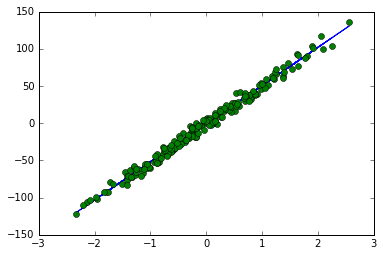

In [64]:
#Fit the regression object on the data
regr.fit(x3,y3)

#Print the score that the fit has
print regr.score(x3_test,y3_test)

#Plot the resulting line
plt.plot(x3,regr.predict(x3))
plt.plot(x3,y3,'o')
plt.show()

0.775075448762


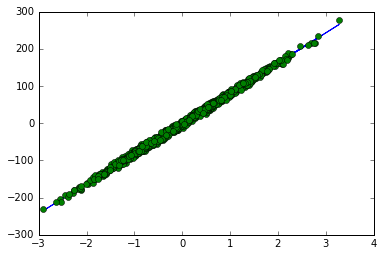

In [65]:
#Fit the regression object on the data
regr.fit(x4,y4)

#Print the score that the fit has
print regr.score(x4_test,y4_test)

#Plot the resulting line
plt.plot(x4,regr.predict(x4))
plt.plot(x4,y4,'o')
plt.show()

0.976404643418


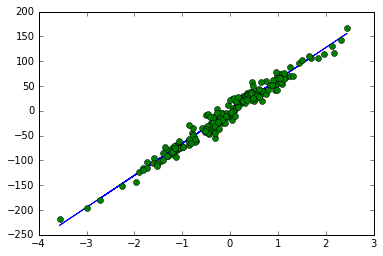

In [66]:
#Fit the regression object on the data
regr.fit(x5,y5)

#Print the score that the fit has
print regr.score(x5_test,y5_test)

#Plot the resulting line
plt.plot(x5,regr.predict(x5))
plt.plot(x5,y5,'o')
plt.show()

## Your analysis


In the first dataset, we are given a set of sample size n=100 and noise=5. We train our machine on this size and we test it on a test set of size n=50. We fit the regression object on the data and we get a regression score of 0.808. We use this dataset as our benchmark and we use the subsequent datasets to see the effect of the different parameters on the regression score. 
For the second dataset, we fix the sample size of the dataset to n=100 and we increase the noise from 5 to 10. If we plot this line, we see that the line does not go through as many points as in the first plot. Accordingly, the regression score decreased to 0.625, where 1.0 is a perfect fit and 0 is a poor fit. So, by increasing the noise, the regression score decrease and therefore the fit of the regression line becomes poor. 
For the third dataset, we increase the sample size of the dataset from n=100 to n=200 and we fix the noise at 5, which is equal to the noise in the first dataset. In thise case, we fit the regression object on the data and we get a regression score of 0.798, which is slightly lower than the first dataset. This means that the fit of the regression line is poor compared to the first dataset. However, I tried another dataset with an even bigger sample size, i.e. n=1000 and with a test set of n=500, and the linear regression line fitted almost perfectly with a regression score of 0.977. This means that a bigger dataset results in a better fit of the regression line. 
In the last dataset, I took a dataset with sample size n=200 and noise=10. When we plot the datapoints, we get a scattering of points and it is hard to draw a regression line through the points. This also results in a low regression score of 0.00458. 
Overall, we observe that a higher sample size generally increase the regression score, while a higher noise decreases the regression score. 

#Gosia: in general the datasets are generated very randomly, right? Isn't it better to let us make a script and take the average out of it? 

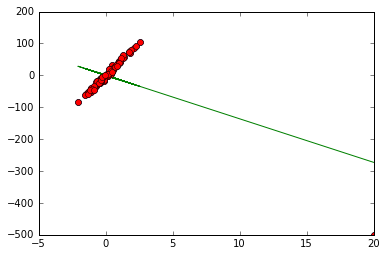

In [67]:
#Add a serious outlier and see what happens

#Example of creating big outlier:
x1[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y1[-1] = -500

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
plt.plot(x1,y1, 'o')
regr.fit(x1,y1)
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()



## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [70]:
import numpy
#Make a prediction function h
def prediction_function(x,theta0,theta1):
    # We implement the formula h(x) = theta_0 + theta_1*x and we make the function suitable for vectors
    # by using the function array. 
    x_predict = theta0 + theta1 * numpy.array(x)
    return x_predict 

In [71]:
import numpy
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    # In the cost function, we implement the formula (1/m) sum_i^m (x_predict[i] - y[i])^2
    # First we set up the parameters and we make sure that x_predict and y are numpy arrays
    # Also, the function only takes vectors of equal size
    m = len(y)
    x_predict = numpy.array(x_predict)
    y = numpy.array(y)
    cost_temp = (x_predict - y)**2 # we subtract the vectors elementwise and we square it elementwise
    cost = (cost_temp.sum())/(2*m) # we take the sum of vector and we divide sum by 2m
    return cost

In [95]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    # The compute_gradient function takes the vectors x_predict, y and x of equal length and gives
    # as an output the vector with the gradient values for theta0 and theta1
    # The function starts with 
    m = len(y)
    grad0 = sum([x_predict[i] - y[i] for i in range(m)]) / m
    grad1 = sum([(x_predict[i] - y[i])*x[i] for i in range(m)]) / m
    return [grad0, grad1] 

compute_gradient([6,9,8],[4,5,6],[1,2,3])

[2, 5]

In [94]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    # The compute_gradient function takes the vectors x_predict, y and x of equal length and gives
    # as an output the vector with the gradient values for theta0 and theta1
    # The function starts with 
    m = len(y)
    x_predict = numpy.array(x_predict)
    y = numpy.array(y)
    x = numpy.array(x)
    grad0 = sum(x_predict - y) / m
    grad1 = sum((x_predict - y)*x) / m
    return [grad0, grad1] 

compute_gradient([6,9,8],[4,5,6],[1,2,3])

[2, 5]

In [100]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    # The compute_gradient function takes the vectors x_predict, y and x of equal length and gives
    # as an output the vector with the gradient values for theta0 and theta1
    # The function starts with 
    m = len(y)
    grad0 = sum(numpy.subtract(x_predict, y)) / m
    grad1 = sum(numpy.subtract(x_predict, y)*x) / m
    return [grad0, grad1] 

compute_gradient([6,9,8],[4,5,6],[1,2,3])

[2, 5]

1.54263141145 80.3173942375
100
543695.015767


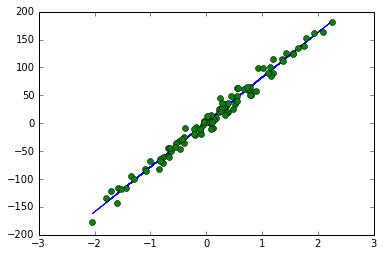

In [85]:
#These are some default parameters, see how playing with them affects the behavior
alpha = 0.1
theta0 = 0
theta1 = 1
x = x2
y = y2
iterations = 100
#Fill in the stopcondition yourself
stopcondition = 0.1


i = 0
cost = 10
#Try to save the output of the cost function at each iteration and plot it at the end
while (i < iterations) and (cost > stopcondition):
    i = i + 1
    x_predict = prediction_function(x, theta0, theta1)
    temp0 = theta0 - alpha * compute_gradient(x_predict, y, x)[0]
    temp1 = theta1 - alpha * compute_gradient(x_predict, y, x)[1]
    theta0 = temp0
    theta1 = temp1
    cost = cost_function(x_predict,y)

print theta0, theta1
print i
print cost
    
plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.show()

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function.

--write here--


# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.

In [ ]:
theta = [0, theta1]
X = [1, x1]